# Logistic Regression 

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values of the independent variables to a value between 0 and 1, which represents the probability of the dependent variable being 1. The logistic function is defined as:

css
Copy code
p = 1 / (1 + e^(-z))
where p is the predicted probability of the dependent variable being 1, e is the base of the natural logarithm, and z is the linear combination of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

Once the model is trained, it can be used to make predictions on new data by inputting the values of the independent variables into the logistic function and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a threshold probability value that is chosen by the user.



## Code 
 Here's an example implementation using gradient descent optimization:

In [1]:
import numpy as np  # 导入numpy库，用于数值计算 / Import numpy library for numerical computations

class LogisticRegression:  # 二分类逻辑回归类 / Binary classification logistic regression class
    
    def __init__(self, learning_rate=0.01, n_iters=1000):  # 构造函数 / Constructor
        self.learning_rate = learning_rate  # 学习率 / Learning rate
        self.n_iters = n_iters  # 最大迭代次数 / Maximum number of iterations
        self.weights = None  # 权重向量 / Weight vector
        self.bias = None  # 偏置项 / Bias term
        
    def fit(self, X, y):  # 训练方法 / Training method
        # 初始化权重和偏置为零 / Initialize weights and bias to zeros
        n_samples, n_features = X.shape  # 获取样本数和特征数 / Get number of samples and features
        self.weights = np.zeros(n_features)  # 初始化权重为零向量 / Initialize weights as zero vector
        self.bias = 0  # 初始化偏置为零 / Initialize bias to zero
        
        # 梯度下降优化 / Gradient descent optimization
        for i in range(self.n_iters):  # 迭代训练 / Iterative training
            # 计算预测概率和损失 / Calculate predicted probabilities and cost
            z = np.dot(X, self.weights) + self.bias  # 线性组合 / Linear combination
            y_pred = self._sigmoid(z)  # 应用sigmoid函数 / Apply sigmoid function
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))  # 交叉熵损失 / Cross-entropy loss
            
            # 计算梯度 / Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # 权重梯度 / Weight gradient
            db = (1 / n_samples) * np.sum(y_pred - y)  # 偏置梯度 / Bias gradient
            
            # 更新权重和偏置 / Update weights and bias
            self.weights -= self.learning_rate * dw  # 更新权重 / Update weights
            self.bias -= self.learning_rate * db  # 更新偏置 / Update bias
            
    def predict(self, X):  # 预测方法 / Prediction method
        # 计算预测概率 / Calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias  # 线性组合 / Linear combination
        y_pred = self._sigmoid(z)  # 应用sigmoid函数 / Apply sigmoid function
        # 将概率转换为二进制预测 / Convert probabilities to binary predictions
        return np.round(y_pred).astype(int)  # 四舍五入为整数 / Round to integers
    
    def _sigmoid(self, z):  # sigmoid激活函数 / sigmoid activation function
        return 1 / (1 + np.exp(-z))  # sigmoid公式 / sigmoid formula


### Test 

In [2]:
# 创建样本数据集 / Create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  # 特征矩阵，5个样本，每个样本2个特征 / Feature matrix: 5 samples, 2 features each
y = np.array([0, 0, 1, 1, 1])  # 标签向量，二分类标签 / Label vector: binary classification labels

# 初始化逻辑回归模型 / Initialize logistic regression model
lr = LogisticRegression()  # 使用默认参数创建模型 / Create model with default parameters

# 在样本数据集上训练模型 / Train model on sample dataset
lr.fit(X, y)  # 训练模型 / Train the model

# 对新数据进行预测 / Make predictions on new data
X_new = np.array([[6, 7], [7, 8]])  # 新的测试数据 / New test data
y_pred = lr.predict(X_new)  # 进行预测 / Make predictions

print(y_pred)  # 打印预测结果 / Print prediction results



[1 1]


### Improvements 
here are some possible improvements you could make to the code:

1. Add regularization: Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code:

2. Use a more sophisticated optimization algorithm: Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD:

In [3]:
import numpy as np  # 导入numpy库，用于数值计算 / Import numpy library for numerical computations

class LogisticRegression:  # 改进版逻辑回归类，支持正则化和mini-batch SGD / Enhanced logistic regression class with regularization and mini-batch SGD
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):  # 构造函数 / Constructor
        self.learning_rate = learning_rate  # 学习率 / Learning rate
        self.n_iters = n_iters  # 最大迭代次数 / Maximum number of iterations
        self.regularization = regularization  # 正则化类型：'l1'或'l2' / Regularization type: 'l1' or 'l2'
        self.reg_strength = reg_strength  # 正则化强度 / Regularization strength
        self.batch_size = batch_size  # mini-batch大小 / Mini-batch size
        self.weights = None  # 权重向量 / Weight vector
        self.bias = None  # 偏置项 / Bias term
        
    def fit(self, X, y):  # 训练方法 / Training method
        n_samples, n_features = X.shape  # 获取样本数和特征数 / Get number of samples and features
        self.weights = np.zeros(n_features)  # 初始化权重为零向量 / Initialize weights as zero vector
        self.bias = 0  # 初始化偏置为零 / Initialize bias to zero
        n_batches = n_samples // self.batch_size  # 计算batch数量 / Calculate number of batches
        for i in range(self.n_iters):  # 迭代训练 / Iterative training
            batch_indices = np.random.choice(n_samples, self.batch_size)  # 随机选择batch索引 / Randomly select batch indices
            X_batch = X[batch_indices]  # 获取batch特征 / Get batch features
            y_batch = y[batch_indices]  # 获取batch标签 / Get batch labels
            z = np.dot(X_batch, self.weights) + self.bias  # 线性组合 / Linear combination
            y_pred = self._sigmoid(z)  # 应用sigmoid函数 / Apply sigmoid function
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))  # 交叉熵损失 / Cross-entropy loss
            if self.regularization == 'l2':  # L2正则化 / L2 regularization
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)  # L2正则化项 / L2 regularization term
                cost += reg_cost  # 添加到损失 / Add to cost
            elif self.regularization == 'l1':  # L1正则化 / L1 regularization
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))  # L1正则化项 / L1 regularization term
                cost += reg_cost  # 添加到损失 / Add to cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))  # 权重梯度 / Weight gradient
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)  # 偏置梯度 / Bias gradient
            if self.regularization == 'l2':  # L2正则化梯度 / L2 regularization gradient
                dw += (self.reg_strength / n_samples) * self.weights  # 添加L2正则化梯度 / Add L2 regularization gradient
            elif self.regularization == 'l1':  # L1正则化梯度 / L1 regularization gradient
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)  # 添加L1正则化梯度 / Add L1 regularization gradient
            self.weights -= self.learning_rate * dw  # 更新权重 / Update weights
            self.bias -= self.learning_rate * db  # 更新偏置 / Update bias
            
    def predict(self, X):  # 预测方法 / Prediction method
        z = np.dot(X, self.weights) + self.bias  # 线性组合 / Linear combination
        y_pred = self._sigmoid(z)  # 应用sigmoid函数 / Apply sigmoid function
        return np.round(y_pred).astype(int)  # 四舍五入为整数 / Round to integers
    
    def _sigmoid(self, z):  # sigmoid激活函数 / sigmoid activation function
        return 1 / (1 + np.exp(-z))  # sigmoid公式 / sigmoid formula


This implementation includes the following improvements:

1. Regularization: You can choose between L1 or L2 regularization by setting the regularization parameter to either 'l1' or 'l2', and adjust the regularization strength with the reg_strength parameter.

2. Mini-batch stochastic gradient descent: The model uses mini-batch SGD (instead of simple gradient descent) to update the weights and bias, which can converge faster and find better optima.


### Test 

In [4]:
# 创建样本数据集 / Create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  # 特征矩阵，5个样本，每个样本2个特征 / Feature matrix: 5 samples, 2 features each
y = np.array([0, 0, 1, 1, 1])  # 标签向量，二分类标签 / Label vector: binary classification labels

# 初始化改进版逻辑回归模型 / Initialize enhanced logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)  # 使用L2正则化和mini-batch SGD / Use L2 regularization and mini-batch SGD

# 在样本数据集上训练模型 / Train model on sample dataset
lr.fit(X, y)  # 训练模型 / Train the model

# 对新数据进行预测 / Make predictions on new data
X_new = np.array([[6, 7], [7, 8]])  # 新的测试数据 / New test data
y_pred = lr.predict(X_new)  # 进行预测 / Make predictions

print(y_pred)  # 打印预测结果 / Print prediction results


[1 1]


## Visualize 

It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

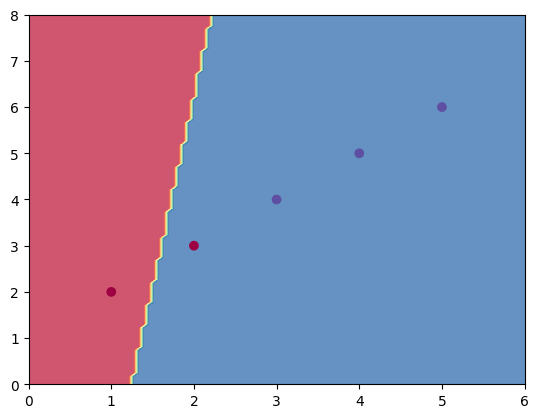

In [5]:
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图 / Import matplotlib library for plotting

# 创建2D数据集 / Create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])  # 特征矩阵，5个样本，每个样本2个特征 / Feature matrix: 5 samples, 2 features each
y = np.array([0, 0, 1, 1, 1])  # 标签向量，二分类标签 / Label vector: binary classification labels

# 初始化逻辑回归模型 / Initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)  # 使用L2正则化和mini-batch SGD / Use L2 regularization and mini-batch SGD

# 在数据集上训练模型 / Train model on dataset
lr.fit(X, y)  # 训练模型 / Train the model

# 绘制决策边界 / Plot decision boundary
x1 = np.linspace(0, 6, 100)  # 创建x1坐标网格 / Create x1 coordinate grid
x2 = np.linspace(0, 8, 100)  # 创建x2坐标网格 / Create x2 coordinate grid
xx, yy = np.meshgrid(x1, x2)  # 创建网格点 / Create grid points
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])  # 对网格点进行预测 / Predict on grid points
Z = Z.reshape(xx.shape)  # 重塑预测结果为网格形状 / Reshape predictions to grid shape
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)  # 绘制决策边界填充图 / Plot decision boundary filled contour

# 绘制数据点 / Plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)  # 绘制原始数据点，用颜色表示类别 / Plot original data points with color-coded classes

plt.show()  # 显示图形 / Display the plot